In [73]:
# importing the dataset
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Datasets for ML/IT_customer_churn.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [74]:
# importing the required packages and modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# checking for any missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
# checking unique values of each column
def printunique(df):
  for i in df:
    if df[i].dtypes=='object':
      print(f'{i}: {df[i].unique()}')
printunique(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [77]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [78]:
# checking the datatypes of each feature
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

**Visualisation of available data**

<Axes: xlabel='Churn', ylabel='count'>

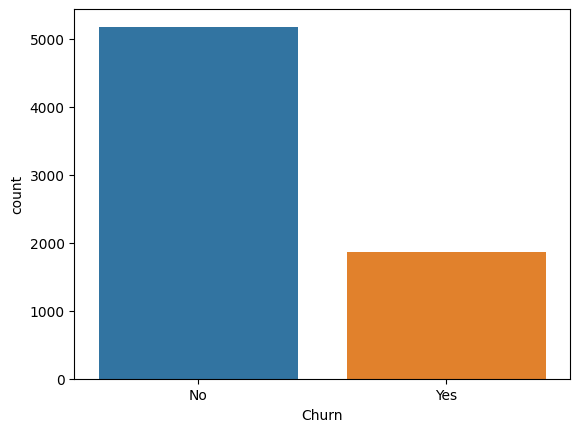

In [80]:
# count plot based on churn observation on available data
sns.countplot(x="Churn",data=df)

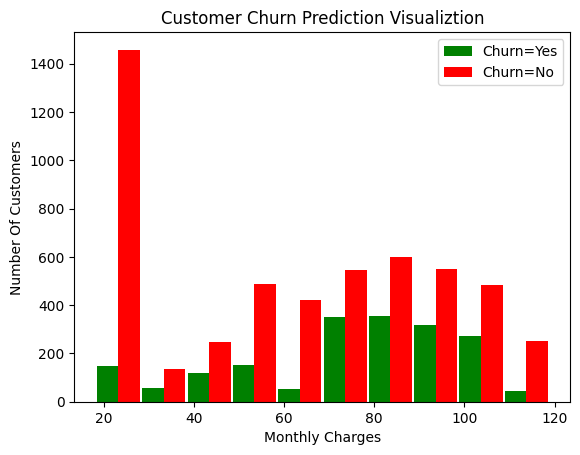

In [81]:
# visualisation of churn prediction based monthly charges
monthly_no=df[df.Churn=='No'].MonthlyCharges
monthly_yes= df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([monthly_yes,monthly_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

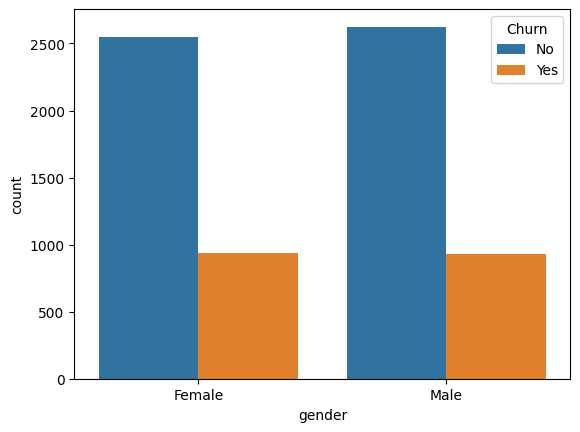

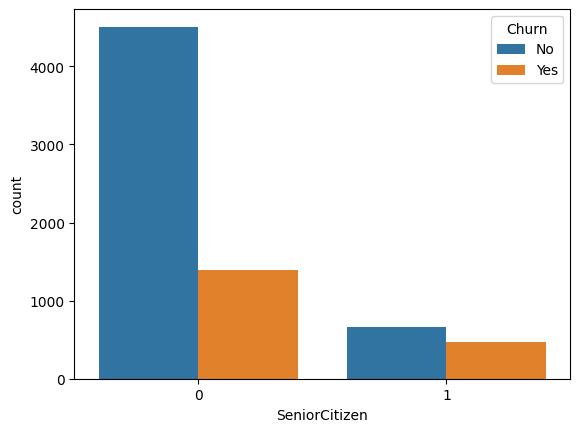

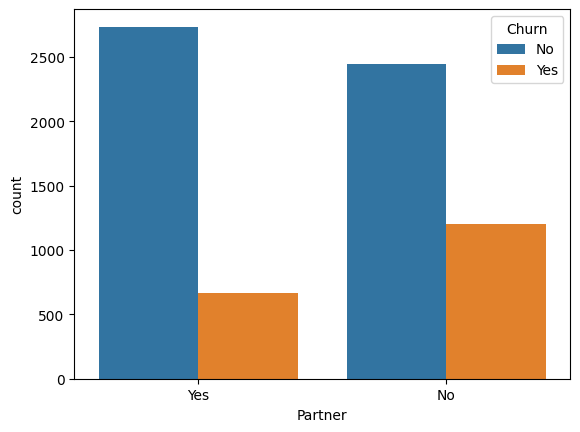

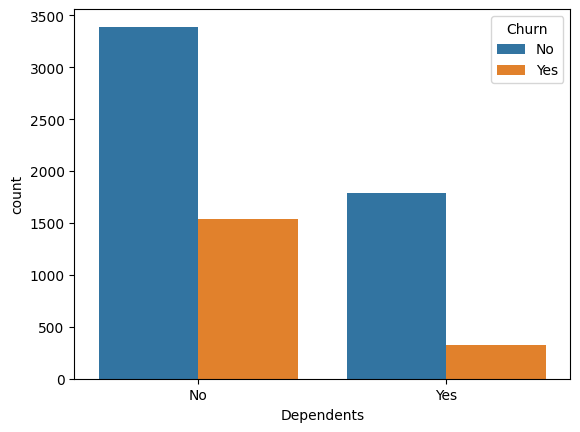

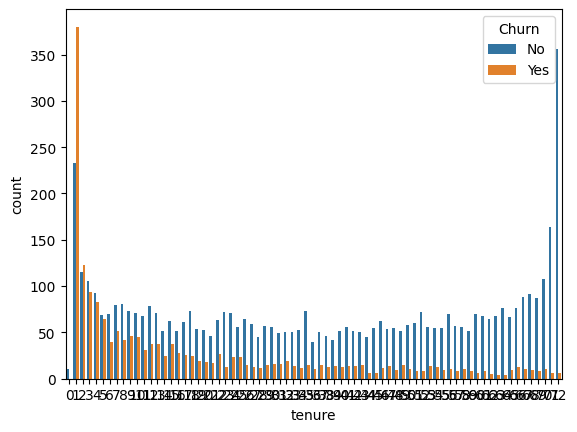

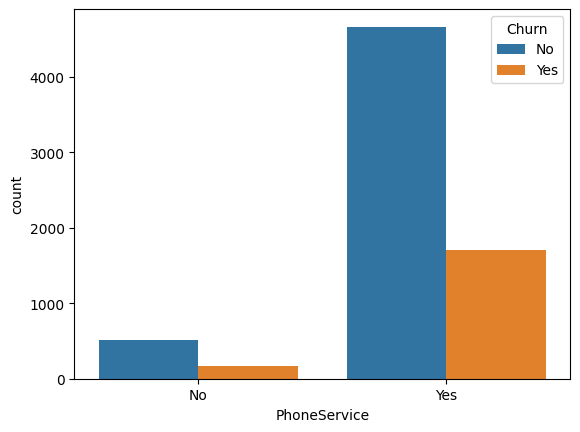

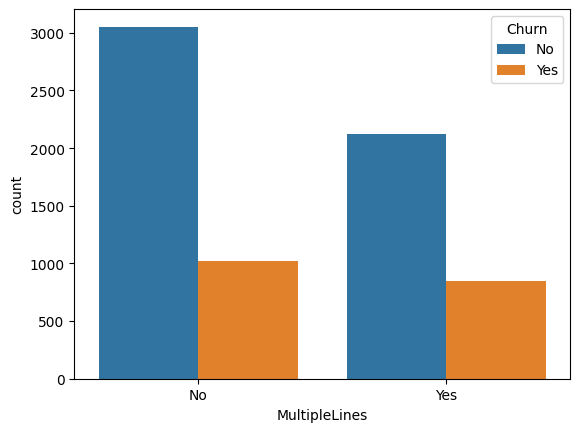

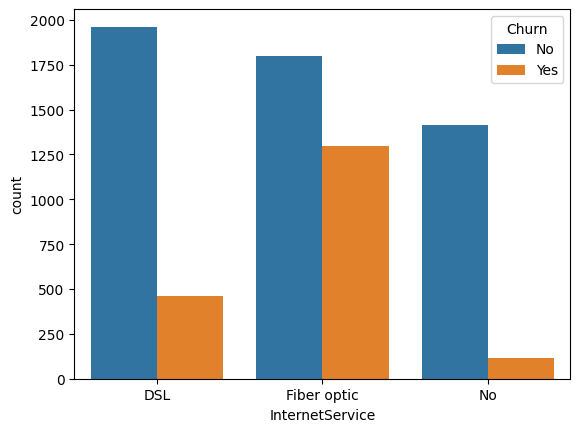

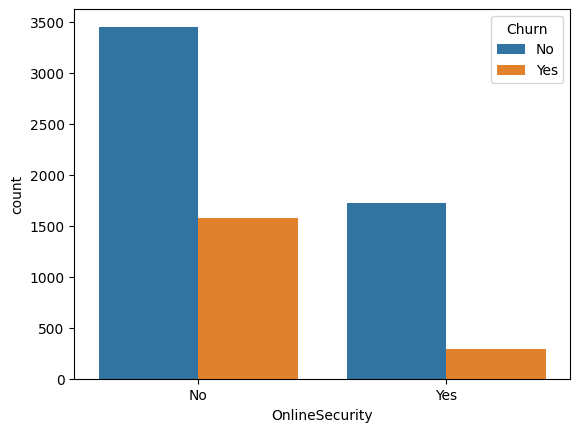

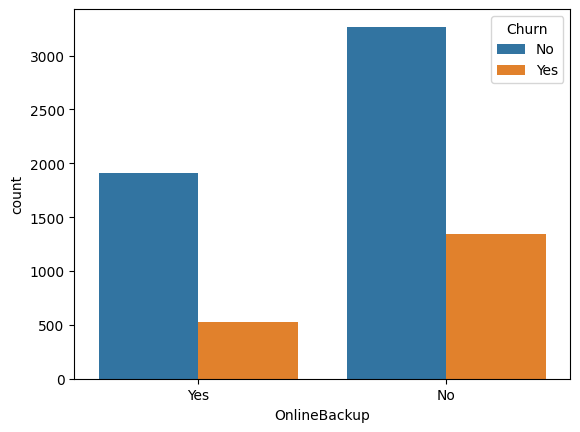

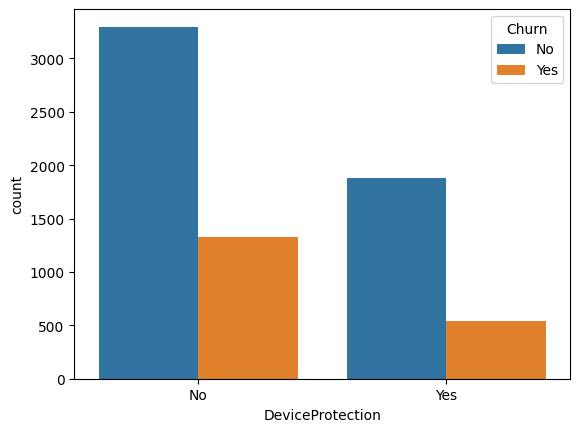

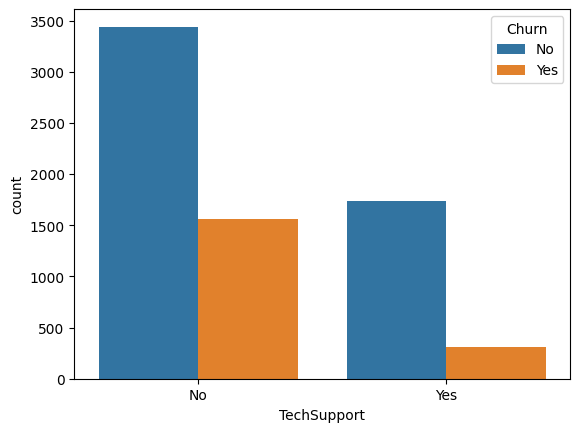

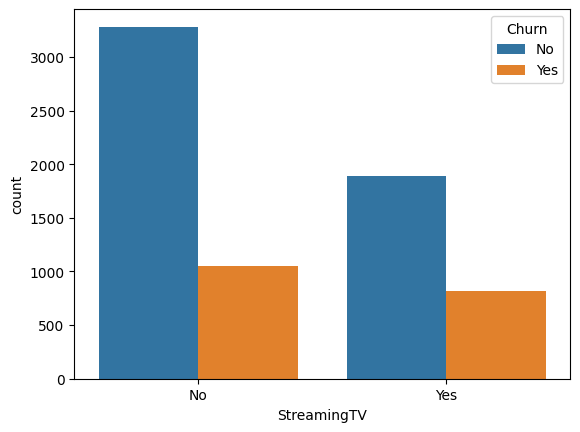

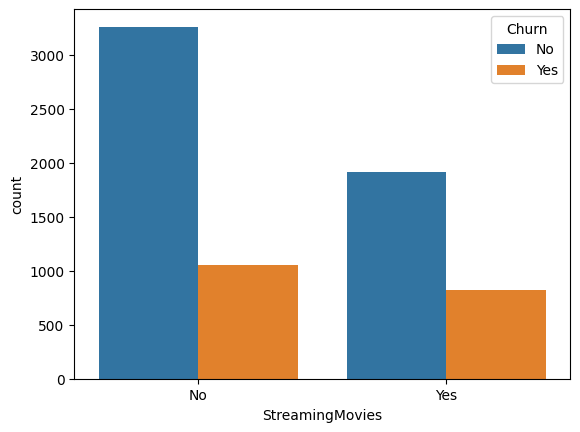

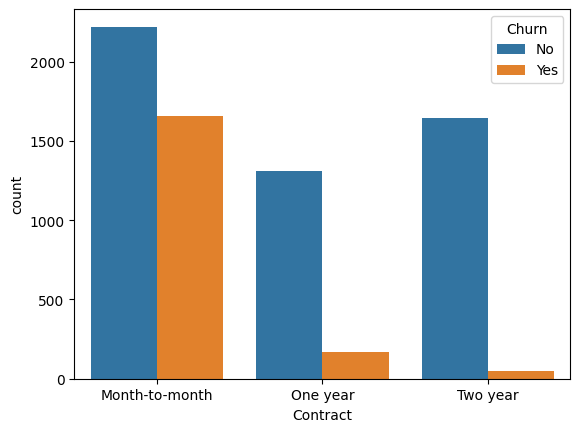

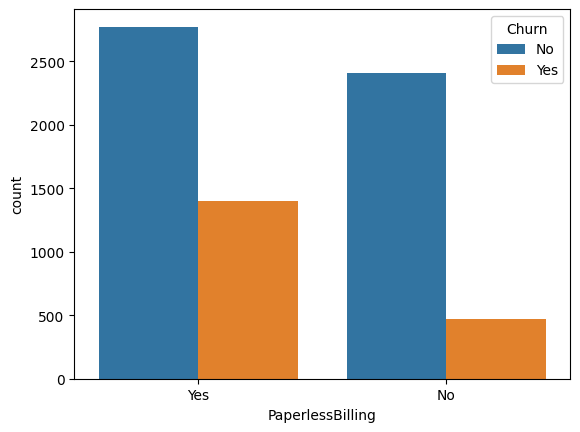

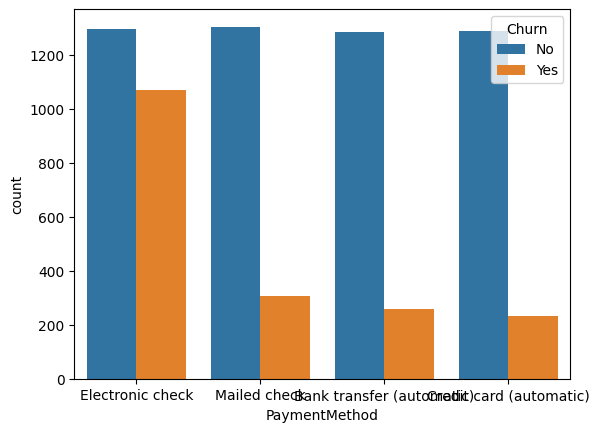

In [82]:
# count plot visualisation for each features
for i,predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=df,x=predictor,hue='Churn')

In [83]:
# label encoding to numerical data
lst=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
     'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,2505,No
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1466,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,157,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1597,No
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,5698,No
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,2994,No
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,2660,Yes


In [84]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [85]:
# scaling using min max scaler
ms=MinMaxScaler()
X=ms.fit_transform(X)

In [86]:
# training set and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**Model building**

In [87]:
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
models=[knn,nb,sv,dt]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.83      0.84      0.84      1585
         Yes       0.51      0.49      0.50       528

    accuracy                           0.75      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.75      0.75      2113

GaussianNB()
              precision    recall  f1-score   support

          No       0.90      0.78      0.83      1585
         Yes       0.53      0.75      0.62       528

    accuracy                           0.77      2113
   macro avg       0.71      0.76      0.73      2113
weighted avg       0.81      0.77      0.78      2113

SVC()
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1585
         Yes       0.64      0.50      0.56       528

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.8

In [88]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Under sampling method**

In [89]:
# under sampling the previous data
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)
y_us.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [90]:
# using new under sampled data in model building
for model in models:
  print(model)
  model.fit(X_us,y_us)
  y_pred_us=model.predict(X_test)
  print(classification_report(y_test,y_pred_us))

KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.94      0.69      0.80      1585
         Yes       0.48      0.86      0.62       528

    accuracy                           0.73      2113
   macro avg       0.71      0.78      0.71      2113
weighted avg       0.82      0.73      0.75      2113

GaussianNB()
              precision    recall  f1-score   support

          No       0.93      0.70      0.80      1585
         Yes       0.48      0.84      0.61       528

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.71      2113
weighted avg       0.82      0.74      0.75      2113

SVC()
              precision    recall  f1-score   support

          No       0.94      0.73      0.82      1585
         Yes       0.51      0.85      0.64       528

    accuracy                           0.76      2113
   macro avg       0.72      0.79      0.73      2113
weighted avg       0.83      0.7

**Over sampling method**

In [91]:
# over sampling the previous data
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [92]:
# model building using new over sampled data
for model in models:
  print(model)
  model.fit(X_os,y_os)
  y_pred_os=model.predict(X_test)
  print(classification_report(y_test,y_pred_os))

KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.97      0.75      0.85      1585
         Yes       0.55      0.92      0.69       528

    accuracy                           0.79      2113
   macro avg       0.76      0.84      0.77      2113
weighted avg       0.86      0.79      0.81      2113

GaussianNB()
              precision    recall  f1-score   support

          No       0.92      0.72      0.81      1585
         Yes       0.49      0.81      0.61       528

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.71      2113
weighted avg       0.81      0.74      0.76      2113

SVC()
              precision    recall  f1-score   support

          No       0.92      0.80      0.86      1585
         Yes       0.58      0.80      0.67       528

    accuracy                           0.80      2113
   macro avg       0.75      0.80      0.77      2113
weighted avg       0.84      0.8

In [93]:
# creating an accuracy table to compare the accuracy score of different model created
from sklearn.metrics import accuracy_score
models=[knn,nb,sv,dt]
accuracy_list_os=[]
for model in models:
    model.fit(X_os, y_os)
    y_pred_os= model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred_os)
    accuracy=round(accuracy,2)*100
    accuracy_list_os.append(accuracy)
accuracy_df=pd.DataFrame({'Model': models,'Accuracy':accuracy_list_os})
accuracy_df=accuracy_df.sort_values(by='Accuracy',ascending=False)
accuracy_df['Model']=[str(model).split("(")[0] for model in accuracy_df['Model']]
accuracy_df.reset_index(drop=True,inplace=True)
print(accuracy_df)

                    Model  Accuracy
0  DecisionTreeClassifier     100.0
1                     SVC      80.0
2    KNeighborsClassifier      79.0
3              GaussianNB      74.0


**Principle component analysis**

In [94]:
# performing pca
from sklearn.decomposition import PCA
pca=PCA(n_components=7,random_state=1)
X_os=pca.fit_transform(X_os)
X_test=pca.transform(X_test)

In [95]:
# prediction using model with hieghest accuracy from observation
dt1=DecisionTreeClassifier()
dt1.fit(X_os,y_os)
y_preddt1=dt1.predict(X_test)
y_preddt1

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [96]:
print(classification_report(y_test,y_preddt1))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      1585
         Yes       0.97      0.98      0.97       528

    accuracy                           0.99      2113
   macro avg       0.98      0.99      0.98      2113
weighted avg       0.99      0.99      0.99      2113



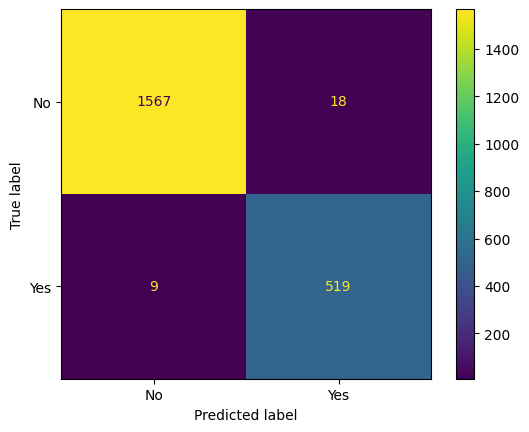

In [97]:
# visualisation of Confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preddt1))

In [98]:
# predicting new values
prediction=dt1.predict(pca.transform([[1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1466]]))
if(prediction[0]==1):
    print('Churn detected')
else:
    print('No changes observed')

No changes observed
